In [1]:
import numpy as np 
import pandas as pd 
from sklearn.preprocessing import normalize, StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score
from EM import em
from Visualization import visualization, interactive_visualization

In [2]:
df = pd.read_csv('iris-clustering.csv')

In [3]:
#Scaling the data to bring all the attributes to a comparable level
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

#Normalizing the data so that the data approximately follows a Gaussian distribution
df_normalized = normalize(df_scaled)

In [4]:
#Converting the numpy array into a pandas DataFrame
df_normalized = pd.DataFrame(df_normalized)
#Renaming the columns
df_normalized.columns = df.columns
df_normalized.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.390160,0.434679,-0.578623,-0.569232
1,-0.518512,-0.057373,-0.608179,-0.598308
2,-0.578457,0.136859,-0.584726,-0.552043
3,-0.631489,0.042163,-0.540152,-0.554689
4,-0.414170,0.499298,-0.542513,-0.533708


In [5]:
n_clusters = 3
cluster_labels = em(n_clusters, df_normalized)

In [6]:
# Calculate metrics
ch_index = calinski_harabasz_score(df_normalized, cluster_labels)
silhouette_avg = silhouette_score(df_normalized, cluster_labels)
db_index = davies_bouldin_score(df_normalized, cluster_labels)

print("Silhouette Score:", silhouette_avg)
print("Calinski Harabasz Score:", ch_index)
print("Davies Bouldin Index:", db_index)

Silhouette Score: 0.6686219166196211
Calinski Harabasz Score: 485.077783230634
Davies Bouldin Index: 0.5291095812381325


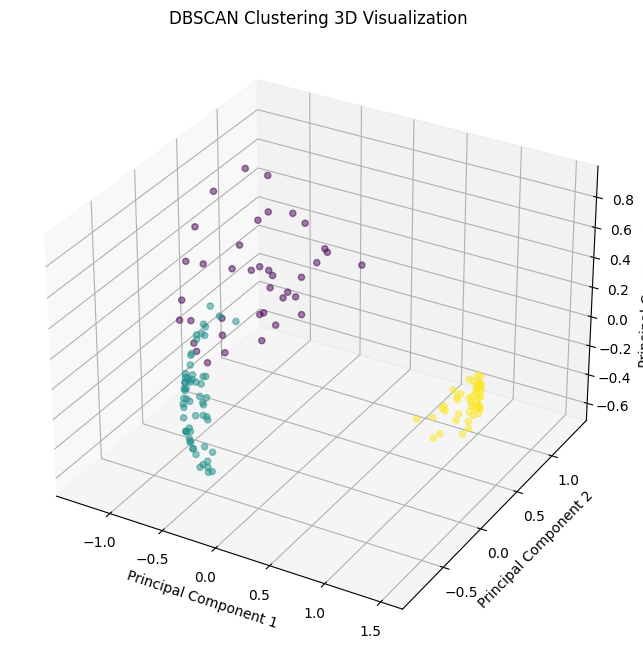

In [7]:
visualization(df_normalized, cluster_labels)

In [8]:
interactive_visualization(df_normalized, cluster_labels)